In [1]:
#1. Фурье-фильтрация сигнала.
#• Смоделировать сигнал из трёх некратных частот, добавить случайный шум.
#• Вычислить спектр сигнала, нарисовать график, оси в реальных единицах (Гц).
#• Избавиться от шума в исходном сигнале путём вырезания “лишних” частот в фурьеспектре.
#• Построить график исходного, зашумлённого и фильтрованного сигнала с легендой.

    
from numpy.random import sample
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq, irfft
from numpy import cos, pi, arange, abs as nabs, where, mean, array, zeros

In [2]:
#• Смоделировать сигнал из трёх некратных частот, добавить случайный шум.

FD = 100
N = 50
filter_line = 3

t = arange(N)/FD
signal = 4*cos(2*pi*37*t) + 6*cos(2*pi*179*t) + 13*cos(2*pi*74*t)
noise = (-6)*sample(signal.shape[0]) + 3 #слишком большая амплитуда шума: (-np.pi, np.pi), хороший шум: (-0.1, 0.1)

noised_signal = signal + noise

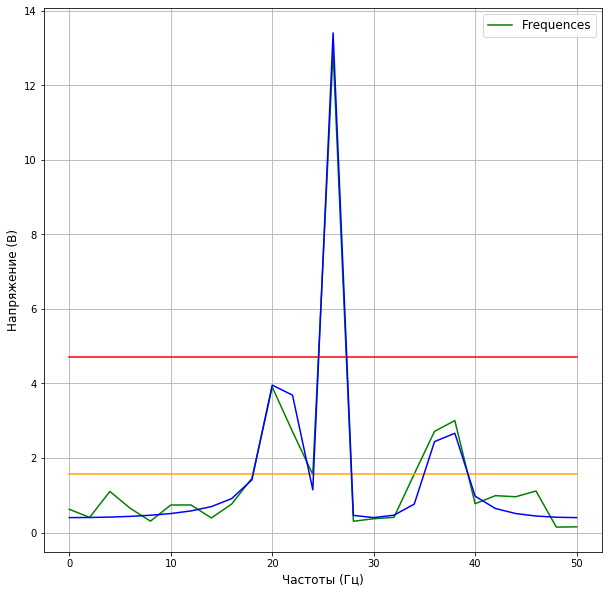

In [3]:
#• Вычислить спектр сигнала, нарисовать график, оси в реальных единицах (Гц).

freq = rfftfreq(N, 1./FD)
clear_ampl = 2*nabs(rfft(signal))/N
ampl = 2*nabs(rfft(noised_signal))/N 
spectrum = rfft(noised_signal)

fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111) 

plt.plot(freq, ampl, label = 'Frequences', c = 'green')
plt.plot(freq, [mean(ampl) for i in range(freq.shape[0])], c = 'orange')
plt.plot(freq, [filter_line*mean(ampl) for i in range(freq.shape[0])], c = 'red')
plt.plot(freq, clear_ampl, c = 'blue')

sub.set_xlabel('Частоты (Гц)', fontsize = 12)
sub.set_ylabel('Напряжение (B)', fontsize = 12)

plt.legend(fontsize = 12)
plt.grid(True)

In [4]:
#• Избавиться от шума в исходном сигнале путём вырезания “лишних” частот в фурьеспектре.
    #пройдём по массиву, возьмем те частоты, при которых рост сменяется спадом
    #возьмем их амплитуды
    #по ним будем делать обратное преобразование Фурье
    #лучше просто убрать маленькие частоты по условию

#первый проход, убираем шум по линии от средней амплитуды      
filtrated_frequances = [freq[i] if ampl[i] > filter_line*mean(ampl) else 0 for i in range(freq.shape[0])]
filtrated_signal = [spectrum[i] if ampl[i] > filter_line*mean(ampl) else 0 for i in range(freq.shape[0])]
    
#Остатки можно почистить ~так: из последовательных данных взять только те частоты которые соответсвуют смене роста на убыль амплитуды 
    
#filtrated_frequances
#можно попробовать всё, что ниже среднего + 18% убирать; Больше 18% получилось - ~30%

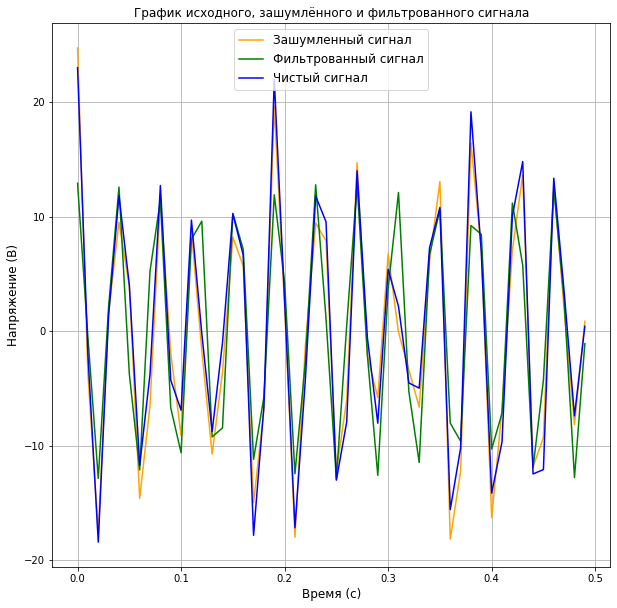

In [5]:
fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111)

plt.plot(t, noised_signal, label = 'Зашумленный сигнал', c = 'orange')
plt.plot(t, irfft(filtrated_signal, N), label = 'Фильтрованный сигнал', c = 'green')
plt.plot(t, signal, label = 'Чистый сигнал', c = 'blue')

sub.set_xlabel('Время (с)', fontsize = 12)
sub.set_ylabel('Напряжение (В)', fontsize = 12)
sub.set_title('График исходного, зашумлённого и фильтрованного сигнала')

plt.legend(loc = 'upper center', fontsize = 12)
plt.grid(True)

In [15]:
signal.shape[0]

100

In [249]:
import numpy

#help(np.shape)
#help(plt.figure().add_subplot())
#help(plt.plot)
#help(plt.legend)
help(numpy.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (defau

In [564]:
#что-то бесполезное но в один момент работаютщее

    #беда с моим исполнением избирания "хороших" частот в том, что я знаю сколько хороших частот
    #беда в том, что я передавал хороший сигнал и думал, что это так и должно работать
    

#for i in range (0, 10): #тут можно оценивать количество главных частот, но это костыль
        #where(ampl == max(ampl))[0][0] #в каждой ячейке лежит число и с ним тип
wm = where(ampl == max(ampl))[0][0]
freq[wm]
    #filtrated_frequances[wm] = freq[wm]
    #filtrated_signal[wm] = spectrum[wm]
        #ampl - max(ampl) это опускает весь сигнал на одну высоту, максимум просто меняет модуль на столько
        #нужно по этому индексу поставить ноль:
    #filtrated_amplitude[wm] = max(ampl)
    #ampl[where(ampl == max(ampl))] = 0
    #занулять амплитуды - хуйня, по амплитудам нужно восстанавливать амлитуды функций
        #ampl[where(ampl == max(ampl))[0][0]] просто пишет max(ampl) :)
#filtrated_amplitude

80.0